In [1]:
import os

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbl_pipe
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv(r'C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\University\20222\Applied statistics and experimental design\Project\Data\analytical_data.csv')
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,2,DIAMOND,464,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,5,GOLD,425,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Satisfaction Score  10000 non-null  int64  
 11  Card Type           10000 non-null  object 
 12  Point Earned        10000 non-null  int64  
 13  Exited              10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# List numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
data[num_features] = data[num_features].astype('float64')

In [5]:
# List categorical features
cat_features = ['Geography', 'Gender', 'Card Type']
data[cat_features] = data[cat_features].astype('string')

## Pre-processing Pipeline
 
 ##Scale numerical data and encode categorical data
Construct a pre-processing pipeline from the given transformers: MinMaxScaler and OneHotEncoder Create lists of indexes from the list of column namesNeed to be numeric not string to specify columns name in column transformer

In [6]:
for col in cat_features:
    print(f"{col} has unique values: {data[col].unique()}")
    print("")

Geography has unique values: <StringArray>
['France', 'Spain', 'Germany']
Length: 3, dtype: string

Gender has unique values: <StringArray>
['Female', 'Male']
Length: 2, dtype: string

Card Type has unique values: <StringArray>
['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']
Length: 4, dtype: string



In [7]:
# One-hot encoding for the cat_features:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_name = ['Geography', 'Gender', 'Card Type']
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), column_name)], remainder = 'passthrough')
data_encoder = ct.fit_transform(data)

We have 1 options for data scaling :

1) Normalization


As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

- Normalization : CreditScore, Balance feature is normalized as it had displayed a right skewed data distribution.


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Scale the selected numerical columns using MinMaxScaler and StandardScaler
data['CreditScore'] = minmax_scaler.fit_transform(data[['CreditScore']])
data['Balance'] = minmax_scaler.fit_transform(data[['Balance']])
data['Tenure'] = minmax_scaler.fit_transform(data[['Tenure']])
data['Age'] = minmax_scaler.fit_transform(data[['Age']])
data['EstimatedSalary'] = minmax_scaler.fit_transform(data[['EstimatedSalary']])
data['Point Earned'] = minmax_scaler.fit_transform(data[['Point Earned']])
data['NumOfProducts'] = minmax_scaler.fit_transform(data[['NumOfProducts']])
data['Satisfaction Score'] = minmax_scaler.fit_transform(data[['Satisfaction Score']])
data = np.array(ct.fit_transform(data))

## Models Training

## Lets' start by splitting our dataframe into separate objects:
y for the target variable

X for the inpur features

In [9]:
# Separate dataframe into separate objects
y = data[:, -1]
X = data[:, :-1]
# display shapes of X and y
print(X.shape, y.shape)

(10000, 19) (10000,)


In [10]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier
random_state = 42
# Define model with pipeline
model = imbl_pipe(SMOTE(sampling_strategy='auto', random_state=random_state),
              KNeighborsClassifier())
model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [11]:
model.fit(X, y)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

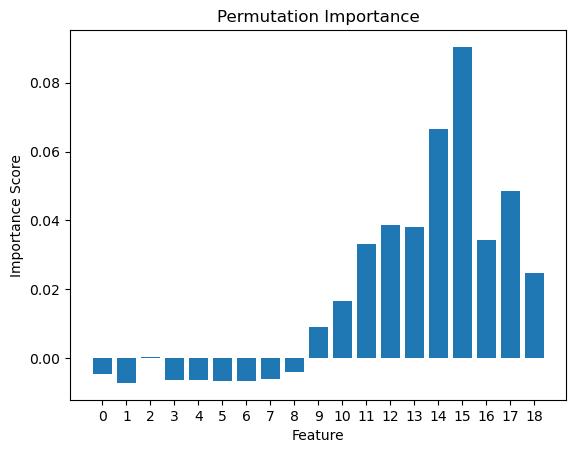

Feature importance scores:
Feature: 15, Score: 0.09042
Feature: 14, Score: 0.06656
Feature: 17, Score: 0.04860
Feature: 12, Score: 0.03882
Feature: 13, Score: 0.03816


In [12]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import warnings
from scipy.stats import mode

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Calculate permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean

# Plot the feature importance
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Permutation Importance')
plt.xticks(range(len(importance)))
plt.show()

# Print feature importance scores
print('Feature importance scores:')
feature_scores = list(enumerate(importance))
feature_scores_sorted = sorted(feature_scores, key=lambda x: x[1], reverse=True)
top_features = feature_scores_sorted[:5]  # Select the top 5 features

for feature, score in top_features:
    print('Feature: %d, Score: %.5f' % (feature, score))

In [13]:
feature = []
for i in top_features:
    feature.append(i[0])
print(feature)
for column in data:
    new_data = np.array([row[feature] for row in data])
print ("New data:")
print(new_data)
X = new_data

[15, 14, 17, 12, 13]
New data:
[[1.         1.         0.25       0.         0.        ]
 [1.         0.         0.5        0.33403148 0.        ]
 [0.         1.         0.5        0.63635718 0.66666667]
 ...
 [1.         0.         0.5        0.         0.        ]
 [0.         1.         0.25       0.29922631 0.33333333]
 [0.         1.         0.5        0.51870777 0.        ]]


## Create a Train Test Split
We will continue with splitting our data into separete training and test sets.

20% of observations will be set aside for the test set

the rest, 80%, will be used as the training set

In [14]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=42)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

8500 1500 8500 1500


In [15]:
 # Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
kn_param_grid = {
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
kn_grid = GridSearchCV(model, kn_param_grid, verbose=3, cv= 10, scoring='accuracy')

In [16]:
kn_grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weights=uniform;, score=0.706 total time=   0.1s
[CV 2/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weights=uniform;, score=0.704 total time=   0.0s
[CV 3/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weights=uniform;, score=0.686 total time=   0.0s
[CV 4/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weights=uniform;, score=0.687 total time=   0.0s
[CV 5/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weights=uniform;, score=0.724 total time=   0.0s
[CV 6/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weights=uniform;, score=0.693 total time=   0.0s
[CV 7/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weights=uniform;, score=0.693 total time=   0.0s
[CV 8/10] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__weig

[CV 6/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=uniform;, score=0.688 total time=   0.3s
[CV 7/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=uniform;, score=0.686 total time=   0.3s
[CV 8/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=uniform;, score=0.682 total time=   0.4s
[CV 9/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=uniform;, score=0.666 total time=   0.4s
[CV 10/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=uniform;, score=0.671 total time=   0.3s
[CV 1/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=distance;, score=0.676 total time=   0.2s
[CV 2/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=distance;, score=0.665 total time=   0.2s
[CV 3/10] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__weights=distance;, score=0.691 total time=   0.2s
[CV 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy', verbose=3)

In [17]:
print(kn_grid.best_params_)

{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__weights': 'uniform'}


In [18]:
print(kn_grid.best_score_)

0.6985882352941177


In [19]:
print(f"Training Data Score: {kn_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {kn_grid.score(X_test, y_test)}")

Training Data Score: 0.7965882352941176
Testing Data Score: 0.7146666666666667


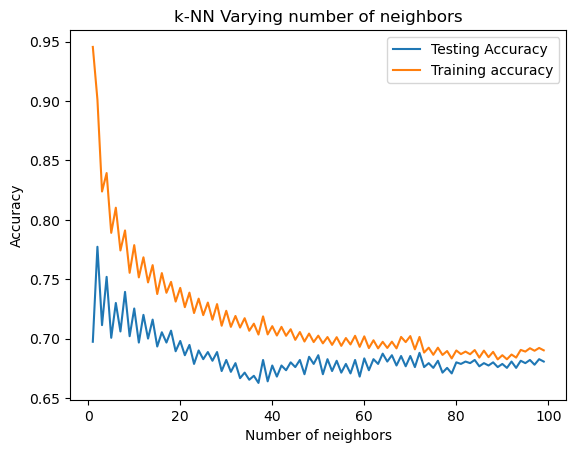

In [20]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(k_neighbors))
test_accuracy = np.empty(len(k_neighbors))

for i, k in enumerate(k_neighbors):
    model = Pipeline([
        ('sampling', SMOTE(sampling_strategy='auto', random_state=random_state)),
        ('classification', KNeighborsClassifier(
            algorithm='brute',
            n_neighbors=k,
            weights='uniform'
        ))
    ])
    
    model.fit(X_train, y_train)
    train_accuracy[i] = model.score(X_train, y_train)
    test_accuracy[i] = model.score(X_test, y_test)

# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(k_neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(k_neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


Show, the best k is: k = 10

In [21]:
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy='auto', random_state=random_state)),
        ('classification', KNeighborsClassifier(
            algorithm='brute',
            n_neighbors=10,
            weights='uniform'
        ))
    ])
    
model.fit(X_train, y_train)
print("train accuracy: ", model.score(X_train, y_train))
print("test accuracy: ", model.score(X_test, y_test))

train accuracy:  0.7787058823529411
test accuracy:  0.7253333333333334


In [22]:
predictions =model.predict(X_test)

In [23]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
1495,0.0,0.0
1496,0.0,0.0
1497,0.0,0.0
1498,1.0,1.0


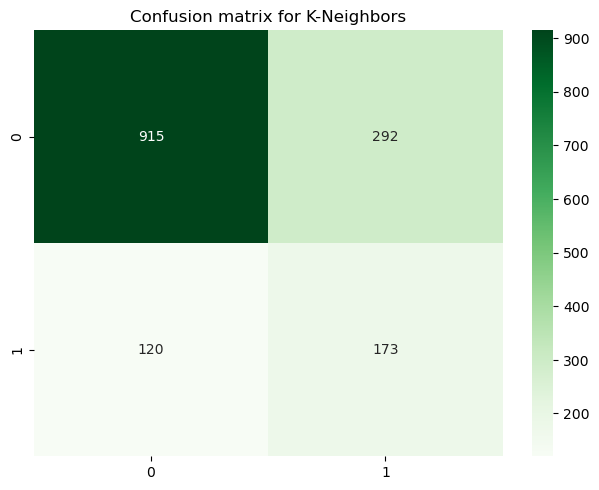

In [24]:
confusion_matrix = confusion_matrix(y_test, predictions)
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='Greens', fmt='g')
plt.tight_layout()
plt.title("Confusion matrix for K-Neighbors")
plt.show()

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82      1207
         1.0       0.37      0.59      0.46       293

    accuracy                           0.73      1500
   macro avg       0.63      0.67      0.64      1500
weighted avg       0.78      0.73      0.75      1500

